In [64]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# read in data
accre = pd.read_csv('data/accre_data.txt', sep='|', low_memory=False)
accre.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,nan,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [65]:
# look at the shape of the dataset
accre.shape

(12499389, 25)

In [66]:
# identify the column names of the dataset
accre.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

In [67]:
# check data types
accre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID        object
JobIDRaw     int64
Cluster      object
Partition    object
Account      object
Group        object
GID          int64
User         object
UID          float64
Submit       object
Eligible     object
Start        object
End          object
Elapsed      object
ExitCode     object
State        object
NNodes       int64
NCPUS        int64
ReqCPUS      int64
ReqMem       object
ReqGRES      object
ReqTRES      object
Timelimit    object
NodeList     object
JobName      object
dtypes: float64(1), int64(5), object(19)
memory usage: 2.3+ GB


### In order analyze how long a job waits in the queue, we need to create a 'Queue Time' column. First, need to convert Submit and Start columns to datetime objects.

In [68]:
# convert Submit and Start to datetime
accre['Submit'] = pd.to_datetime(accre['Submit'], format='%Y/%m/%d')
accre['Start'] = pd.to_datetime(accre['Start'], format='%Y/%m/%d')

In [69]:
# check head of Submit
accre.Submit.head()

0   2017-07-02 00:40:58
1   2017-07-02 00:40:58
2   2017-07-02 00:40:58
3   2017-07-02 00:40:58
4   2017-07-01 05:00:00
Name: Submit, dtype: datetime64[ns]

In [70]:
# check head of Start
accre.Start.head()

0   2017-07-03 02:13:59
1   2017-07-03 02:20:08
2   2017-07-03 02:41:13
3   2017-07-03 02:51:53
4   2017-07-01 05:00:01
Name: Start, dtype: datetime64[ns]

##### Now we can subtract Submit from Start to get the Queue Time.

In [71]:
# create Queue_Time column = Start - Submit
accre['Queue_Time'] = accre['Start'] - accre['Submit']
accre.Queue_Time.head()

0   1 days 01:33:01
1   1 days 01:39:10
2   1 days 02:00:15
3   1 days 02:10:55
4   0 days 00:00:01
Name: Queue_Time, dtype: timedelta64[ns]

In [72]:
# remove unnecessary rows to decrease number of columns
cols = ['JobIDRaw','Partition','Cluster','JobName']
accre_reduced_cols = accre.drop(columns=cols)
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time
0,15806649,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01
1,15806664,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10
2,15806670,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15
3,15806671,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55
4,15811617,cms_samtest,cms_samtest,59297,uscms010,nan,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01


In [74]:
# get top 20 groups by JobID
accre_reduced_cols[['GID', 'Group', 'JobID']].groupby(['GID','Group']).agg('count').sort_values(by ='JobID', ascending=False).head(20)

,,JobID
GID,Group,
31000,cms,5069955
59350,beam_lab,1497401
59420,p_csb_meiler,737597
36068,mip_eecs,577413
10023,p_meiler,455407
59298,cms_stage1,454797
59402,lola,449909
59331,h_biostat_student,446182
59422,math,371131


In [75]:
# get bottom 20 groups by jobID
accre_reduced_cols[['GID', 'Group', 'JobID']].groupby(['GID','Group']).agg('count').sort_values(by ='JobID', ascending=True).head(20)

,,JobID
GID,Group,
20483,skaar_lab,4
20807,vuscl,5
59307,h_lasko_lab,6
59284,nbody_gpu,6
20458,trueblood_lab,8
20495,biomath,12
20813,smith_lab,23
59397,aldrich_lab,33
59335,p_blocher,34


In [76]:
# get top 20 groups by user
accre_reduced_cols[['UID', 'User', 'JobID']].groupby(['UID','User']).agg('count').sort_values(by ='JobID', ascending=False).head(20)

,,JobID
UID,User,
"207,302",deik,667769
"574,202",sotocs,646076
"9,209",autocms,471424
"9,202",cmslocal,467394
"233,240",cakira,416327
"501,421",ozgunka,373381
"342,713",zhangdk,371131
"173,433",shockle,308142
"171,357",janjamrk,302093


In [77]:
# get bottom 20 groups by user
accre_reduced_cols[['UID','User','JobID']].groupby(['UID','User']).agg('count').sort_values(by='JobID', ascending=True).head(20)

,,JobID
UID,User,
"593,160",maya3,1
"200,890",elmoree,1
"513,096",carlsobl,1
"512,952",dongew,1
"55,566",dubeya,1
"672,295",pateloj,1
"53,902",barquela,1
"508,699",luok,1
"692,041",millertw,1


In [78]:
# get the most frequent values for ReqMem -- need to import Counter from collections
from collections import Counter

mem_types = Counter(accre_reduced_cols.ReqMem)
mem_types.most_common(10)

[('5000Mn', 2341060),
 ('28000Mn', 2038338),
 ('2Gc', 889885),
 ('1024Mn', 808080),
 ('10Gn', 745088),
 ('8000Mn', 620378),
 ('16000Mn', 615156),
 ('4Gn', 378371),
 ('2000Mn', 374385),
 ('20Gn', 357188)]

In [79]:
# get the most frequent values for ReqMem
accre_reduced_cols.ReqMem.value_counts(ascending=False).head(10)

5000Mn     2341060
28000Mn    2038338
2Gc         889885
1024Mn      808080
10Gn        745088
8000Mn      620378
16000Mn     615156
4Gn         378371
2000Mn      374385
20Gn        357188
Name: ReqMem, dtype: int64

In [80]:
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time
0,15806649,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01
1,15806664,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10
2,15806670,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15
3,15806671,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55
4,15811617,cms_samtest,cms_samtest,59297,uscms010,nan,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01


## Question: How does the amount of time requested affect a job's queue time?

##### Need to convert Timelimit column into a more usable format.

In [81]:
# create requested_days, _hours, _minutes, _seconds to later calculate Timelimit in total seconds
requested_days = pd.to_numeric(accre_reduced_cols['Timelimit'].str[:-9]).fillna(value=0)
requested_hours = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-8:-6])
requested_minutes = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-5:-3])
requested_seconds = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-2:])
requested_days.head(10)

0   9
1   9
2   9
3   9
4   2
5   0
6   0
7   2
8   0
9   0
Name: Timelimit, dtype: float64

In [82]:
requested_hours.head(10)

0    4
1    4
2    4
3    4
4    0
5   12
6   12
7    0
8   12
9   12
Name: Timelimit, dtype: float64

In [83]:
requested_minutes.head(10)

0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0
Name: Timelimit, dtype: float64

In [84]:
requested_seconds.head(10)

0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0
Name: Timelimit, dtype: float64

In [86]:
# write a formula to get Timelimit in total seconds using the variables requested_days, _hours, _minutes, _seconds
accre_reduced_cols['ReqTime'] = (requested_days*86400)+(requested_hours*3600)+(requested_minutes*60)+requested_seconds
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime
0,15806649,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,"792,000"
1,15806664,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,"792,000"
2,15806670,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,"792,000"
3,15806671,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,"792,000"
4,15811617,cms_samtest,cms_samtest,59297,uscms010,nan,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,"172,800"


### Let's create a new dataframe to see top Users sorted by Requested Time to see how that affects Queue Time.

In [91]:
# create new dataframe with User, UID, ReqTime, Queue_Time, grouped by UID and sorted descending by ReqTime
user_queue = accre_reduced_cols[['UID','User','ReqTime','Queue_Time']].sort_values(by='ReqTime', ascending=False)
user_queue.head()

,UID,User,ReqTime,Queue_Time
672490,"389,801",vanzod,"2,592,000",00:55:54
1104873,"389,801",vanzod,"2,592,000",00:00:00
672141,"389,801",vanzod,"2,592,000",00:05:29
1099312,"389,801",vanzod,"2,592,000",16:31:31
1104866,"389,801",vanzod,"2,592,000",00:00:00


In [128]:
user_queue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12499389 entries, 672490 to 10259142
Data columns (total 4 columns):
UID           float64
User          object
ReqTime       float64
Queue_Time    float64
dtypes: float64(3), object(1)
memory usage: 476.8+ MB


In [99]:
# convert Queue_Time to seconds
user_queue['Queue_Time'] = user_queue['Queue_Time'].astype('timedelta64[s]')

In [100]:
user_queue.shape

(12499389, 4)

##### Need to gather a random sample of User IDs to plot ReqTime vs. Queue_Time.

In [152]:
# random sample of users (1000000)
indices = np.random.randint(0, len(user_queue), 1000000)
user_queue_subset = user_queue.iloc[indices]
user_queue_subset.head()

,UID,User,ReqTime,Queue_Time
4681365,"126,986",tuos,"43,200",35
3421859,"85,636",sauermf,"216,000",26
585629,"85,636",sauermf,"72,000",1
6495649,nan,cmsglidein,"172,800","3,613"
11783771,"207,302",deik,"90,000","56,810"


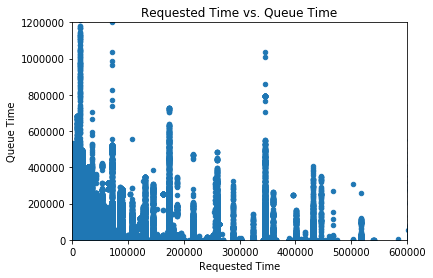

In [153]:
# create a scatter plot to see relationship between requested time and queue time
user_queue_subset.plot(kind='scatter', x='ReqTime', y='Queue_Time')
plt.xlim(0,600000)
plt.ylim(0,1200000)
plt.title('Requested Time vs. Queue Time')
plt.xlabel('Requested Time')
plt.ylabel('Queue Time')
plt.show()

The above scatter plot shows the relationship between Requested Time and Queue Time, both in seconds. This relationship is not what I expected - I was exepecting to see an increase in queue time as a user requests more time per job. However, this plot shows that requesting more time does not result in a greater amount of queue time. This plot instead suggests that requesting more time either does not have an effect on queue time or that requesting more time results in less queue time.

## Now let's look at the relationship between requested memory and queue time.

##### First we need to fix the ReqMem column. We need to extract only numeric values and then convert into megabytes for consistency.

In [154]:
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime,ReqMem_Num,ReqMem_Str
0,15806649,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,"792,000",12,Gn
1,15806664,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,"792,000",12,Gn
2,15806670,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,"792,000",12,Gn
3,15806671,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,"792,000",12,Gn
4,15811617,cms_samtest,cms_samtest,59297,uscms010,nan,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,"172,800","4,000",Mn


In [155]:
accre_reduced_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID         object
Account       object
Group         object
GID           int64
User          object
UID           float64
Submit        datetime64[ns]
Eligible      object
Start         datetime64[ns]
End           object
Elapsed       object
ExitCode      object
State         object
NNodes        int64
NCPUS         int64
ReqCPUS       int64
ReqMem        object
ReqGRES       object
ReqTRES       object
Timelimit     object
NodeList      object
Queue_Time    timedelta64[ns]
ReqTime       float64
ReqMem_Num    float64
ReqMem_Str    object
dtypes: datetime64[ns](2), float64(3), int64(4), object(15), timedelta64[ns](1)
memory usage: 2.3+ GB


##### ReqMem is of type object. We need to find the string characters in each cell and split it away from the numeric characters.

In [156]:
# use regular expressions to split the ReqMem column into two - ReqMem_Num and ReqMem_Str
accre_reduced_cols[['ReqMem_Num','ReqMem_Str']] = accre_reduced_cols['ReqMem'].str.extract('(\d+\.?\d*)([A-Za-z]+)', expand=True)
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime,ReqMem_Num,ReqMem_Str
0,15806649,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01,"792,000",12,Gn
1,15806664,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10,"792,000",12,Gn
2,15806670,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15,"792,000",12,Gn
3,15806671,h_vuiis,h_vuiis,36052,masispider,nan,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,...,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55,"792,000",12,Gn
4,15811617,cms_samtest,cms_samtest,59297,uscms010,nan,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,...,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01,"172,800",4000,Mn


In [157]:
# convert ReqMem_Num from object to numeric
accre_reduced_cols['ReqMem_Num'] = pd.to_numeric(accre_reduced_cols['ReqMem_Num'])
accre_reduced_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID         object
Account       object
Group         object
GID           int64
User          object
UID           float64
Submit        datetime64[ns]
Eligible      object
Start         datetime64[ns]
End           object
Elapsed       object
ExitCode      object
State         object
NNodes        int64
NCPUS         int64
ReqCPUS       int64
ReqMem        object
ReqGRES       object
ReqTRES       object
Timelimit     object
NodeList      object
Queue_Time    timedelta64[ns]
ReqTime       float64
ReqMem_Num    float64
ReqMem_Str    object
dtypes: datetime64[ns](2), float64(3), int64(4), object(15), timedelta64[ns](1)
memory usage: 2.3+ GB


In [158]:
# need to convert ReqMem_Num from gigabytes to megabytes
# write a for loop to iterate over each cell - if 'G' in ReqMem_Str, multiply ReqMem_Num by 1000
for x in accre_reduced_cols:
    if accre_reduced_cols.ReqMem_Str == 'Gn':
        accre_reduced_cols.ReqMem_Num = ReqMem_Num * 1000
    elif accre_reduced_cols.ReqMem_Str == 'Gc':
        accre_reduced_cols.ReqMem_Num = ReqMem_Num * 1000
    else:
        accre_reduced_cols.ReqMem_Num = ReqMem_Num * 1
        
accre_reduced_cols.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().